# Trabajo Computacional 3

In [1]:
#import sys
#sys.path.append('/home/lucia/.local/lib/python2.7/site-packages')

In [29]:
import networkx as nx
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors
import numpy as np
from  collections  import defaultdict
from scipy import optimize
import os
from lectura import ldata
import community
import rpy2.robjects as robjects
#import robjects as robjects


In [2]:
# El directorio que vamos a usar en cada lectura de datos de ahora en mas
directorio = os.path.dirname(os.path.realpath("dolphins.txt"))

In [3]:
fnDOL = os.path.join(directorio,'dolphins.gml')
delfines = nx.read_gml(fnDOL)
generos=ldata('dolphinsGender.txt')

In [4]:
# Asigno la clase genero a cada nodo de la red
for delfin in generos:
    if delfin[1]=='m':
        delfines.node[delfin[0]]["genero"]=0
    elif delfin[1]=='f':
        delfines.node[delfin[0]]["genero"]=1
    else:
        delfines.node[delfin[0]]["genero"]=2

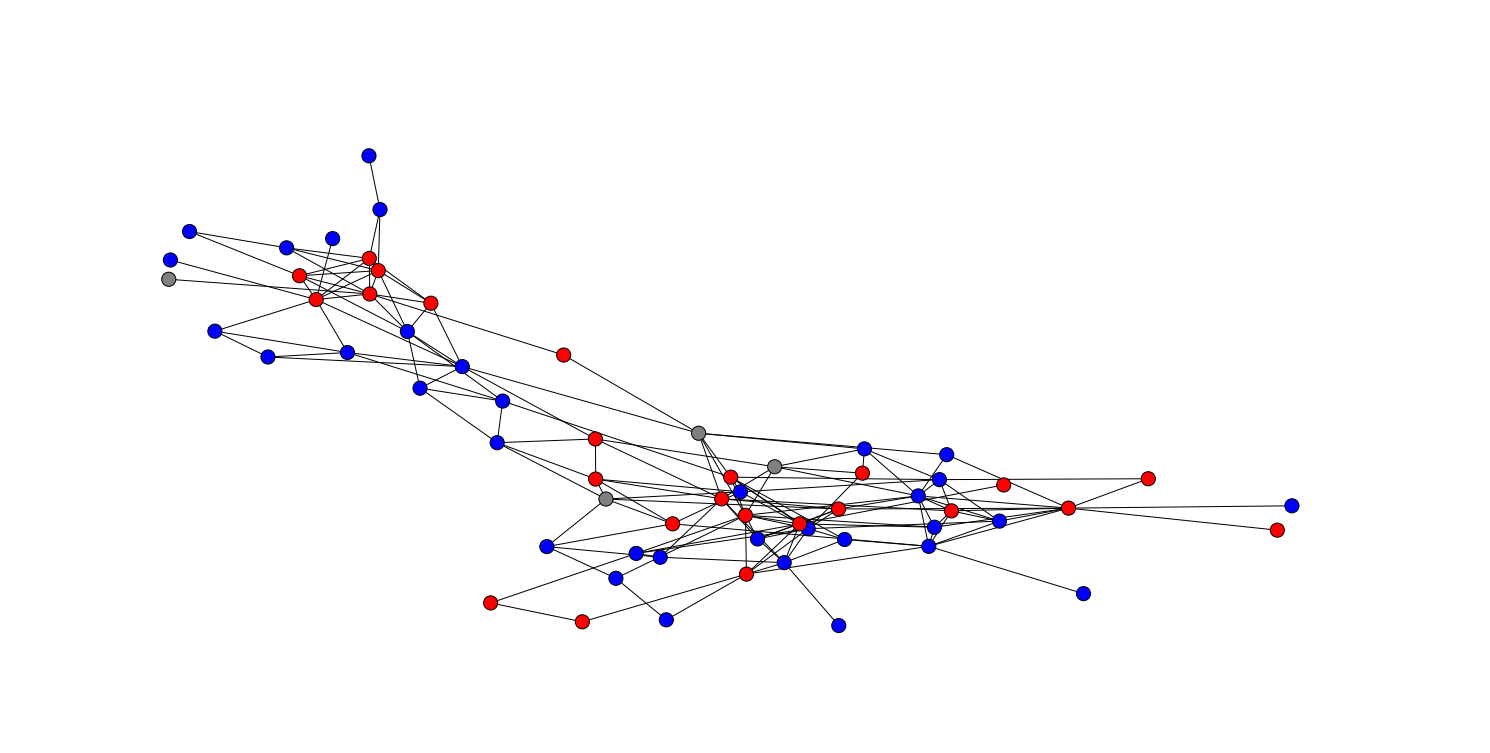

In [5]:
plt.figure(figsize=(20,10))
nx.draw(delfines, 
        width=1, 
        node_color=["blue" if g==0 else "red" if g==1 else "grey"  for g in nx.get_node_attributes(delfines, "genero").values()], 
        node_size=200,
        with_labels=False,
       pos=nx.fruchterman_reingold_layout(delfines)
       )
plt.show()

In [6]:
#delfines.edges

Encuentre la partición en clusters de esta red utilizando la metodología Louvain, infomap,fast_greedy y edge_betweenness. Visualice los resultados gráficamente.

In [7]:
def community(nxG, algorithm, fig_name = "G"):
    """
    In:
        nxG: grafo de networkx.
        algorithm: string, entre las siguientes opciones: 
            fast_greedy
            edge_betweenness
            louvain
            infomap
        fig_name: nombre de la figura que se genera al clsuterizar. Le agrega automaticamente el nombre del algoritmo usado y el nombre del grafo si lo tuviere
    Out:
        labels: numpy array con la pertenencia de cada nodo al cluster.
    
    """
    gml_file_name = "G.gml"
    fig_name += "_"+nxG.name+"_"+algorithm+".svg"
    nx.write_gml(nxG, gml_file_name)
    
    igG = robjects.r('''
        f <- function(file, algorithm, fig_name, v_names){
            require("igraph")     
            
            G <- read.graph(file, "gml")
            V(G)$name <- as.character(unlist(v_names))
            #format = c("edgelist", "pajek", "ncol", "lgl", "graphml","dimacs", "graphdb", "gml", "dl"), ...)
            
            if(algorithm == "fast_greedy"){
                c <- fastgreedy.community(G)
                #c <- cluster_fast_greedy(G, merges = TRUE, modularity = TRUE, membership = TRUE)
            }
            
            if(algorithm == "edge_betweenness"){
                c <- edge.betweenness.community(G)
                #c <- cluster_edge_betweenness(G,directed = FALSE,edge.betweenness = TRUE)
            }
            
            if(algorithm == "louvain"){
                c <- multilevel.community(G)
                #c <- cluster_louvain(G)
            }
            
            if(algorithm == "infomap"){
                #c <- cluster_infomap(G)
                c <- infomap.community(G)
            }
            
            svg(fig_name)
            plot(c, G)
            dev.off()
            
            return(list(membership(c), as.character(V(G)$name)))
        }
    ''')
    
    labels = igG(gml_file_name, algorithm, fig_name, list(dict(nxG.nodes(data=True)).keys()))
    os.remove(gml_file_name)
    return {name: int(label) for name, label in zip(labels[1],labels[0])}

In [8]:
labels_fastgreedy = community(delfines,"fast_greedy")
labels_bet = community(delfines,"edge_betweenness")
labels_louvain = community(delfines,"louvain")
labels_infomap = community(delfines,"infomap")

/home/alang/.local/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: igraph

  warnings.warn(x, RRuntimeWarning)
/home/alang/.local/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
Attaching package: ‘igraph’


  warnings.warn(x, RRuntimeWarning)
/home/alang/.local/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following objects are masked from ‘package:stats’:

    decompose, spectrum


  warnings.warn(x, RRuntimeWarning)
/home/alang/.local/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following object is masked from ‘package:base’:

    union


  warnings.warn(x, RRuntimeWarning)


dict_values([1, 2, 3, 1, 4, 1, 3, 4, 5, 1, 1, 3, 1, 5, 5, 4, 4, 1, 3, 4, 3, 3, 1, 1, 1, 3, 4, 1, 3, 4, 3, 3, 3, 1, 1, 1, 5, 3, 5, 1, 1, 3, 2, 3, 1, 3, 3, 3, 3, 3, 4, 4, 1, 1, 3, 1, 5, 4, 1, 4, 5, 4])


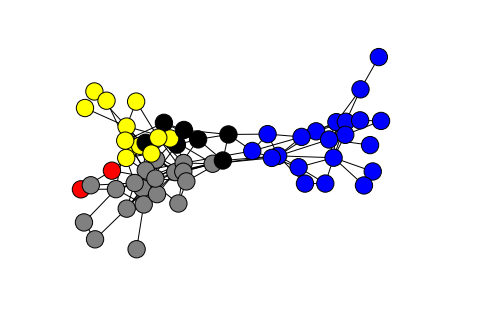

In [9]:
comunidades=labels_bet
    
nx.set_node_attributes(delfines, comunidades, 'edge_betweenness')
nx.draw(delfines,node_color=["blue" if g==1.0 else "red" if g==2.0 else "grey" if g==3.0
                              else "yellow" if g==4.0 else "black" if g==5.0 else "green" for g in nx.get_node_attributes(delfines,"edge_betweenness").values()],)
print (nx.get_node_attributes(delfines, 'edge_betweenness').values())

dict_values([1, 2, 2, 1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 1, 2, 3, 3, 1, 2, 3, 2, 2, 1, 1, 1, 3, 3, 1, 2, 3, 2, 2, 2, 1, 1, 1, 2, 2, 2, 4, 1, 2, 2, 4, 1, 3, 2, 2, 2, 2, 3, 3, 1, 1, 3, 1, 2, 3, 1, 3, 2, 3])


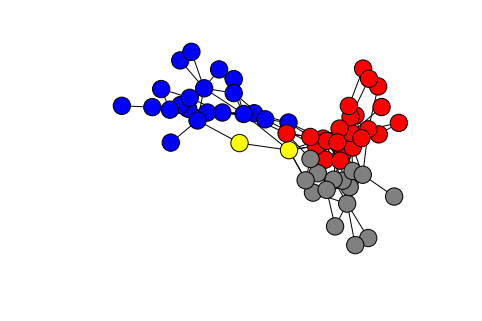

In [10]:
comunidades=labels_fastgreedy
    
nx.set_node_attributes(delfines, comunidades, 'fastgreedy')
nx.draw(delfines,node_color=["blue" if g==1.0 else "red" if g==2.0 else "grey" if g==3.0
                              else "yellow" if g==4.0 else "black" if g==5.0 else "green" for g in nx.get_node_attributes(delfines,"fastgreedy").values()],)
print (nx.get_node_attributes(delfines, "fastgreedy").values())

dict_values([1, 2, 2, 1, 4, 1, 2, 4, 5, 1, 1, 2, 5, 5, 5, 4, 4, 1, 2, 4, 2, 2, 1, 1, 1, 3, 4, 5, 2, 4, 2, 2, 2, 1, 1, 1, 5, 2, 5, 3, 1, 2, 2, 3, 1, 3, 2, 2, 2, 2, 4, 4, 1, 1, 3, 1, 5, 4, 1, 4, 5, 4])


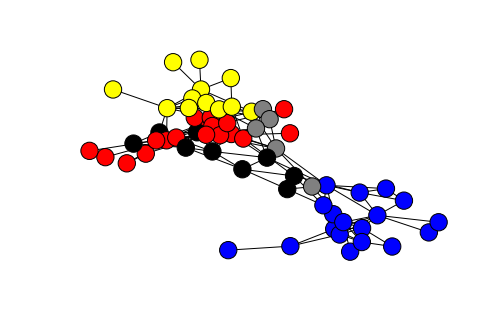

In [11]:
comunidades = labels_louvain
    
nx.set_node_attributes(delfines, comunidades, 'louvain')
nx.draw(delfines,node_color=["blue" if g==1.0 else "red" if g==2.0 else "grey" if g==3.0
                              else "yellow" if g==4.0 else "black" if g==5.0 else "green" for g in nx.get_node_attributes(delfines,"louvain").values()],)
print (nx.get_node_attributes(delfines, "louvain").values())

dict_values([1, 6, 2, 1, 3, 1, 2, 3, 4, 1, 1, 2, 1, 4, 4, 3, 3, 1, 2, 3, 2, 2, 1, 1, 1, 5, 3, 1, 2, 3, 2, 2, 2, 1, 1, 1, 4, 2, 4, 5, 1, 2, 6, 5, 1, 5, 2, 2, 2, 2, 3, 3, 1, 1, 5, 1, 4, 3, 1, 3, 4, 3])


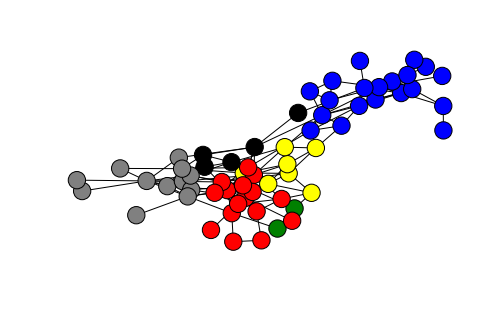

In [12]:
comunidades = labels_infomap

    
nx.set_node_attributes(delfines, comunidades, 'infomap')
nx.draw(delfines,node_color=["blue" if g==1.0 else "red" if g==2.0 else "grey" if g==3.0
                              else "yellow" if g==4.0 else "black" if g==5.0 else "green" for g in nx.get_node_attributes(delfines,"infomap").values()],)
print (nx.get_node_attributes(delfines, "infomap").values())

In [13]:
#Modularidad
def modularidad(G,atributo):
    Q=0. #modularidad
    TotalEdges=float(G.number_of_edges())

    for cluster in set(nx.get_node_attributes(G,atributo).values()):
        nodescluster = [x for x,y in G.nodes(data=True) if y[atributo]==cluster]
        L=0.#Cantidad de edges al interior de un cluster 
        a=0.#candidad de posibles edges del cluster
        for nodo1 in nodescluster:
            #a=a+G.degree(nodo1)
            for nodo2 in nodescluster:
                if (nodo1,nodo2) in G.edges():
                    L+=1
                if (nodo2,nodo1) in G.edges():
                    L+=1 
                a+=G.degree(nodo1)*G.degree(nodo2)/(2*TotalEdges)
                #print(a)
                #print(L)

        #Q=Q+(L/(2*TotalEdges)-(a/(2*TotalEdges))**2) #Se suma la modularidad del cluster
        Q=Q+(1./(2*TotalEdges))*(L-a)
        #print(a)
        #print(L)
    return Q

In [15]:
#######ejemplo

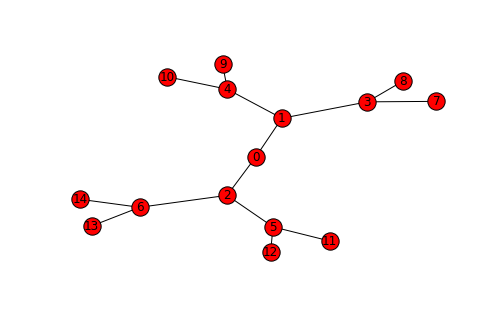

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import community
arbol = nx.balanced_tree(h=3,r=2)
nx.draw(arbol,with_labels=True)
plt.show()

In [54]:
partition = community.best_partition(arbol)

nx.set_node_attributes(arbol, partition, 'partition')
partition

{0: 0,
 1: 0,
 2: 0,
 3: 1,
 4: 2,
 5: 3,
 6: 4,
 7: 1,
 8: 1,
 9: 2,
 10: 2,
 11: 3,
 12: 3,
 13: 4,
 14: 4}

In [53]:
silouethe(arbol,'partition')

0 0.75
1 0.4
2 0.4
3 0.666666666667
4 0.666666666667
5 0.666666666667
6 0.666666666667
7 0.666666666667
8 0.666666666667
9 0.666666666667
10 0.666666666667
11 0.666666666667
12 0.666666666667
13 0.666666666667
14 0.666666666667


0.63666666666666671

In [18]:
#######termina

In [14]:
#Silouethe
def silouethe(G,atributo):
    S={}
    
    for nodo,atri in G.nodes(data=True):
        cluster=atri[atributo]
        nodescluster = [x for x,y in G.nodes(data=True) if y[atributo]==cluster]
        
        a=np.mean([nx.shortest_path_length(G,nodo,nodo2) for nodo2 in set(nodescluster)])
        
        #for nodo2 in G.nodes()-nodescluster:
        #    print(nodo,nodo2)
        #    caminos.append(nx.shortest_path_length(G,nodo,nodo2))
        bcluster=[]
        for recorrido in set(nx.get_node_attributes(G,atributo).values())-{cluster}:
            clusters= [x for x,y in G.nodes(data=True) if y[atributo]==recorrido]
            bcluster.append(np.mean([nx.shortest_path_length(G,nodo,nodo2) for nodo2 in clusters]))
        b=np.min(bcluster)
        s=(b-a)/float(max(a,b))
        S[nodo]=s
    return np.mean(list(S.values()))

In [15]:
algoritmo='fastgreedy'
print(modularidad(delfines,algoritmo),silouethe(delfines,algoritmo))

0.5402278390886432 -0.00462591363431


In [16]:
algoritmo='edge_betweenness'
print(modularidad(delfines,algoritmo),silouethe(delfines,algoritmo))

0.41855543688936375 0.0139984302455


In [17]:
algoritmo='louvain'
print(modularidad(delfines,algoritmo),silouethe(delfines,algoritmo))

0.388730667299553 0.028559190685


In [18]:
algoritmo='infomap'
print(modularidad(delfines,algoritmo),silouethe(delfines,algoritmo))

0.38544756932083385 0.00895517789871


In [19]:
algoritmo='genero'
print(modularidad(delfines,algoritmo),silouethe(delfines,algoritmo))

0.7274830900676399 0.0408651193873


In [20]:
def MatrizConfu(G,atributo1,atributo2):
    tx=len(set(nx.get_node_attributes(G,atributo1).values()))
    ty=len(set(nx.get_node_attributes(G,atributo2).values()))
    M=np.zeros((tx+1,ty+1))
    for node,atri in G.nodes(data=True):
        i=int(atri[atributo1])
        j=int(atri[atributo2])
        M[i][j]+=1
    M=M/np.sum(M)
    return M

In [21]:
G=delfines
atributo=[0,0,0,0,0]
atributo[0]='fastgreedy'
atributo[1]='edge_betweenness'
atributo[2]='louvain'
atributo[3]='infomap'
atributo[4]='genero'
lista=[[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
for i in range(5):
    for j in range(5):
        lista[i][j]=MatrizConfu(G,atributo[i],atributo[j])
#lista es la tabla de matrices de confusión

In [22]:
informacion=[[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
for i in range(5):
    for j in range(5):
        matriz=lista[i][j]
        marginal1=np.sum(matriz,axis=0)
        marginal2=np.sum(matriz,axis=1)
        entropiatotal=0
        entropia1=0
        entropia2=0
        flatmatriz = [item for sublist in matriz for item in sublist]
        for k in range(len(flatmatriz)):
            if flatmatriz[k]>0:
                    entropiatotal+=-flatmatriz[k]*np.log(flatmatriz[k])

        for k in range(len(marginal1)):
            if marginal1[k]>0:
                    entropia1+=-marginal1[k]*np.log(marginal1[k])

        for k in range(len(marginal2)):
            if marginal2[k]>0:
                    entropia2+=-marginal2[k]*np.log(marginal2[k])

        try:
            informacion[i][j]=float(2*(entropia1+entropia2-entropiatotal)/(entropia1+entropia2))
        except:
            informacion[i][j]=0

In [23]:
informacion

[[1.0,
  0.677782194880677,
  0.7693947980879774,
  0.7822659335206399,
  0.057380261747824235],
 [0.677782194880677,
  1.0,
  0.8121306436478088,
  0.911097656787842,
  0.05182730661681388],
 [0.7693947980879774,
  0.8121306436478088,
  1.0,
  0.9090402368868526,
  0.07343043337476483],
 [0.7822659335206399,
  0.911097656787842,
  0.9090402368868528,
  1.0,
  0.0973231590950684],
 [0.057380261747824235,
  0.05182730661681388,
  0.07343043337476521,
  0.09732315909506876,
  1.0]]

In [24]:
representacion=np.zeros((3,len(set(nx.get_node_attributes(G,"infomap").values()))+1))

for nodo in G.nodes:
    dict1=nx.get_node_attributes(delfines, "genero")
    dict2=nx.get_node_attributes(delfines, "infomap")
    representacion[dict1[nodo],dict2[nodo]]+=1
representacion

array([[  0.,  13.,   7.,   8.,   3.,   1.,   2.],
       [  0.,   6.,   9.,   4.,   3.,   2.,   0.],
       [  0.,   1.,   0.,   0.,   1.,   2.,   0.]])

In [25]:
#random

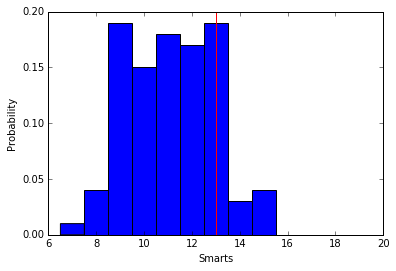

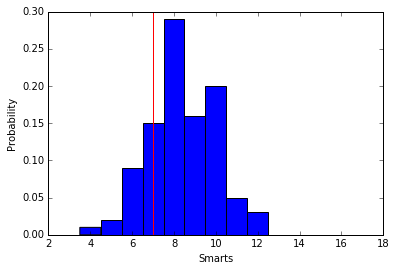

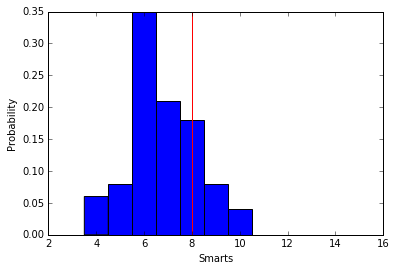

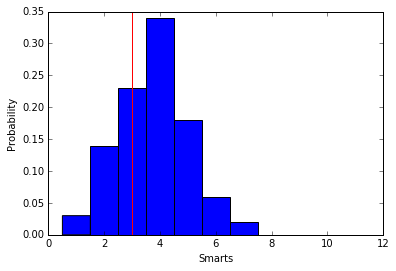

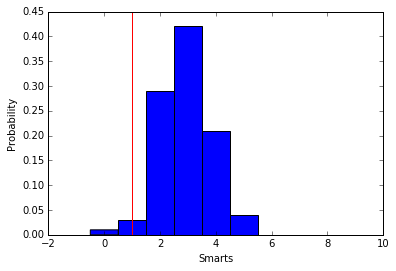

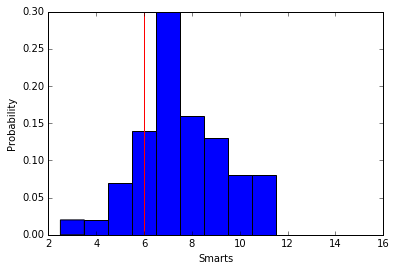

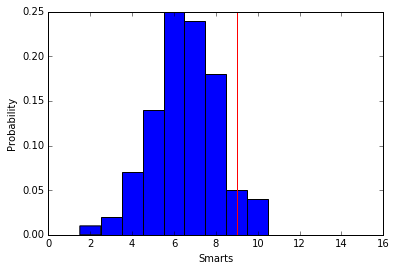

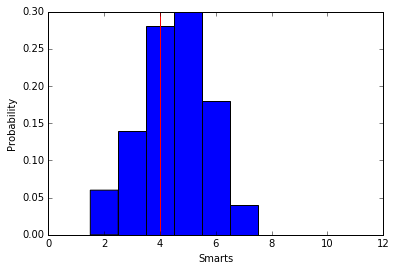

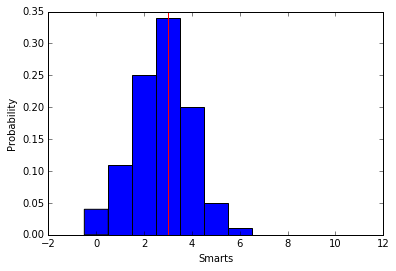

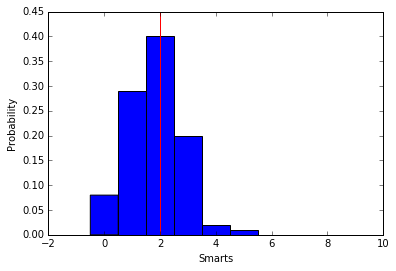

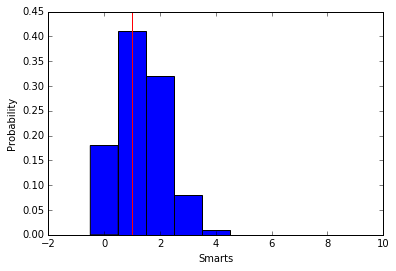

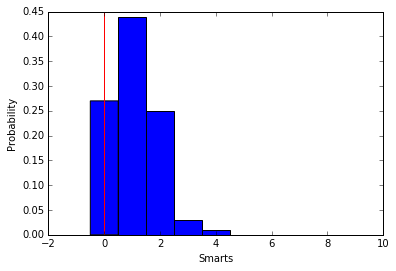

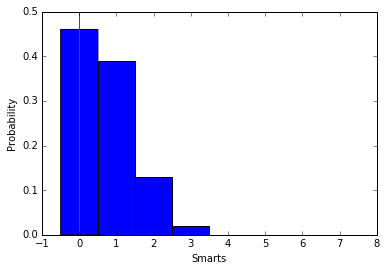

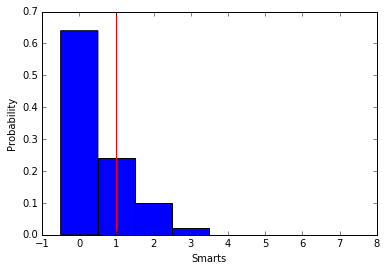

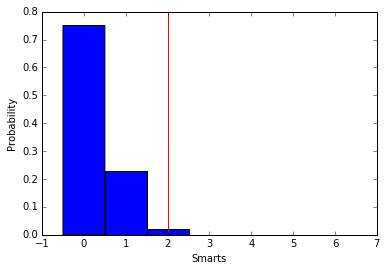

In [46]:
sexos=dict(delfines.node.data("genero"))
N=100
G=delfines
random=np.zeros((4,N))
represrandom=np.zeros((3,len(set(nx.get_node_attributes(G,"infomap").values()))+1,N))
# N realizaciones aleatorias de genero  
for j in range(N):
    for delfin,genero in zip(G,np.random.permutation(list(sexos.values()))):
        # Asigna genero a delfines(nodos) de test a partir de la realizacion aleatoria       
        G.node[delfin]["genero2"]=genero
        


    for nodo in G.nodes:
        dict1=nx.get_node_attributes(delfines, "genero2")
        dict2=nx.get_node_attributes(delfines, "infomap")
        represrandom[dict1[nodo],dict2[nodo],j]+=1. 
        
for k in range(3):
    for l in range (1,6):
        left_of_first_bin = represrandom[k,l,:].min() - float(1)/2
        right_of_last_bin = represrandom[k,l,:].max() + float(1)/2
        plt.hist(represrandom[k,l,:],np.arange(left_of_first_bin, right_of_last_bin + 5, 1), normed=True)  
        plt.axvline(representacion[k,l], c="red")
        plt.xlabel('Smarts')
        plt.ylabel('Probability')
        plt.show()